In [ ]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

In [ ]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

In [ ]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

In [ ]:
import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.utils import pprint
from konlpy.tag import Mecab

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/컨퍼_리뷰 및 자소서 분석/(완)항목별리뷰데이터.csv')
df.head(10)

,Unnamed: 0,회사명,플랫폼,항목,의견,리뷰
0,0,(주)위메프,블라인드,연봉,장점,역세권 사무실워라밸 좋음구내식당(주로 돈가스 같은 저렴한 재료만씀)자사몰 이용시 임...
1,1,(주)위메프,블라인드,조직문화,장점,"7시 칼퇴근수평적 분위기맛있는 구내식당 (점심:2500원, 저녁:2000원)"
2,2,(주)위메프,블라인드,NaN,장점,정시퇴근뿐이지만 그안에 모든걸 다 해결해야 퇴근한다…..
3,3,(주)위메프,블라인드,워라밸,장점,워라벨은 보장됩니다. 7시 칼퇴! 회사 역세권이고 구내식당 보유
4,4,(주)위메프,블라인드,NaN,장점,"자유로운 연차 사용, 보고체계가 복잡하지 않고 단순해서 좋음."
5,5,(주)위메프,블라인드,워라밸,장점,워라벨이 보장되는 회사야근 거의 없음구내 식당 있음
6,6,(주)위메프,블라인드,워라밸,장점,장점은워라밸사내문화개발문화개인역량향상위메프 적립식당
7,7,(주)위메프,블라인드,워라밸,장점,어느정도 경험 쌓기 괜찮음분위기 자유로움워라벨 잘 지켜짐
8,8,(주)위메프,블라인드,워라밸,장점,"워라밸 , 저녁이 있는 삶 가능.구내식당 점심 잘 먹을 수 있음"
9,9,(주)위메프,블라인드,워라밸,장점,워라벨이 좋다.임직원 15프로 할인된다.건강검진 기관이 좋다.구내식당이 있다.


In [ ]:
a=''
for review in df.head(10000)['리뷰']:
    # a+(mecab.nouns(review))
    a+=review

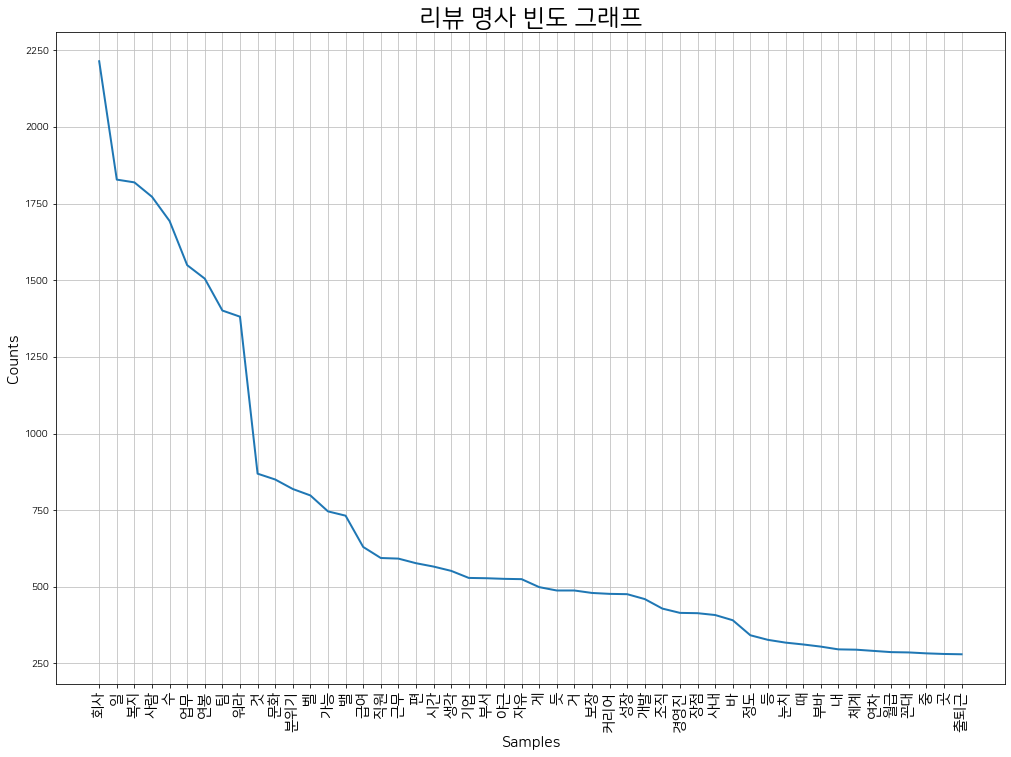

In [ ]:
from nltk import Text
plt.rcParams["font.family"] = 'NanumSquareRound'

fig = plt.figure(figsize=(17,12))
ax = fig.add_subplot(1,1,1)

ax.set_title('리뷰 명사 빈도 그래프', fontsize=25)
ax.set_xlabel('명사', size=15)
ax.set_ylabel('빈도', size=15)
text_review = Text(mecab.nouns(a), name="text_review")

text_review.plot(50)
plt.show()

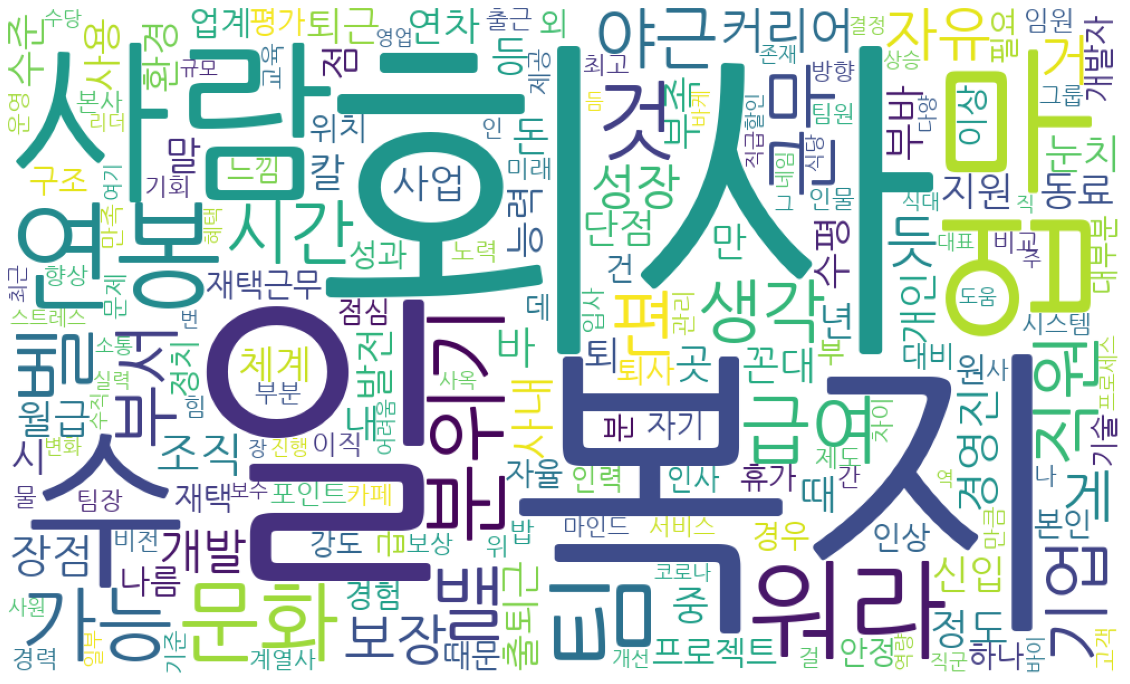

In [ ]:
from wordcloud import WordCloud

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fig = plt.figure(figsize=(20,20))

wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_path)
plt.imshow(wc.generate_from_frequencies(text_review.vocab()))
plt.axis("off")
plt.show()

# TF-IDF

In [ ]:
import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.utils import pprint
from konlpy.tag import Mecab

In [ ]:
mecab = Mecab()
sentence = "제 13회 투빅스 컨퍼런스 발표를 맡은 ToBiz입니다!"
temp_X = mecab.pos(sentence)
temp_X

[('제', 'XPN'),
 ('13', 'SN'),
 ('회', 'NNBC'),
 ('투', 'NR'),
 ('빅스', 'NNP'),
 ('컨퍼런스', 'NNG'),
 ('발표', 'NNG'),
 ('를', 'JKO'),
 ('맡', 'VV'),
 ('은', 'ETM'),
 ('ToBiz', 'SL'),
 ('입니다', 'VCP+EF'),
 ('!', 'SF')]

In [ ]:
def tokenizer_split(text):
    result = text.split()
    return result

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
def tfidf_count(text, max_features):
    tfidf = TfidfVectorizer(max_features=max_features, tokenizer=tokenizer_split, ngram_range = (1,2), sublinear_tf=True)
    tdm = tfidf.fit_transform(text)
    word_count_tfidf = pd.DataFrame({
    '단어':tfidf.get_feature_names(),
    '빈도':tdm.sum(axis=0).flat
    })
    word_count_tfidf = word_count_tfidf.sort_values('빈도', ascending=False)
    return word_count_tfidf

In [ ]:
stopword = ['가능','강도','결정','경영','경우','관리','구조','그렇','근무','기관','기본','기업','대비','대한','따라','바이','비해','정도','따라','이상','위한','해야','해도','여기', '자기','매출','해서','코로나','나옴','인해','포인트','관련','최근','중요','위해','업계','부분','느낌','본인','다르','다닐','자체','기준','특성','처리','그룹','전체','인한','어디','의사','제외','가지','상황','분야','대해','이름','방식','자신','누구','그런지','그것','직군','우리','일반','특정','와서','거기','구성','내용','다음','가진','기타','인지','통해','대해서','형태','단위','이것저것','당시']

In [ ]:
tag_classes = ['NNG', 'NNP','VA', 'VV+EC','VV+ETM', 'NP', 'NNBC', 'VA+EC','SL']

def extract_noun_mecab(text):   
    clean_word = []
    result = mecab.pos(text)
    for word, tag in result:
        if tag in tag_classes:
            if (word not in stopword) and len(word) > 1:
                clean_word.append(word)
            
    return " ".join(clean_word)    

In [ ]:
review_pre = df['리뷰'].apply(lambda x: extract_noun_mecab(x))
review_pre

0         역세 사무실 워라 구내식당 돈가스 재료 사몰 용시 임직원 적립
1                   칼퇴근 수평 분위기 맛있 구내식당 점심 저녁
2                                정시 퇴근 해결 퇴근
3                        워라 보장 회사 역세 구내식당 보유
4                             자유 연차 사용 체계 단순
                         ...                
317385        보고 보고 꼰대 다수 노조 밥그릇 싸움 멜츠 출신 승진
317386               전산 전산 시간 비효 울적 개선 사항 개선
317387                     무능 상사 공채 출신 업무 효율
317388           안정 영업 어려움 타사 효율 실질 개선 의지 부족
317389                              정체 부서 편차
Name: 리뷰, Length: 317390, dtype: object

200개 키워드 추출해서 쓸모없는 단어 보고나서 키워드 수 점차 늘려나가면서 불용

In [ ]:
review_keyword = tfidf_count(review_pre,800)
review_keyword

# 자소서 불용어 - 링커리어

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

In [ ]:
df2 = pd.read_excel('/content/drive/MyDrive/컨퍼_리뷰 및 자소서 분석/링커리어 자소서_연도추가.xlsx')
df2.head(5)

,회사명,직무대분류,직무명,내용,스펙,연도/상하반기
0,KB부동산신탁,경영 사무,경영,1. 본인이 지원한 직무에 적합한 이유에 대하여 서술해 주시기 바랍니다.\n(500...,"한국외대 / 경영학전공 / 학점 3.43 / 토익: 865, 토익스피킹: 140/레...",2021 상반기
1,국토안전관리원,경영 사무,경영,1. 최근 국토안전관리원의 주요 이슈에 대해 한 가지를 선택하여 그것에 대한 본인의...,"부경대 / 산업공학과 / 학점 3.26 / 토익: 790, 토익스피킹: , 오픽: ...",2021 상반기
2,대구시설공단,경영 사무,사무직(경영지원),지원동기와 입사 후 조직의 비전 달성을 위해 어떠한 기여를 할 수 있는지 기술하여 ...,"계명대학교 / 정치외교학 / 학점 4.11/4.5 / 토익: 905, 오픽: IH ...",2020 하반기
3,서울주택도시공사,경영 사무,사무직_경영지원,서울주택도시공사에 지원하게 된 동기는 무엇인지 기술해 주십시오. * [500자 이내...,국민대 / 영어영문학부 / 학점 3.99/4.5 / 토익: 945 / 사회생활 경험...,2020 하반기
4,사립학교교직원연금공단,경영 사무,경영/행정/사무,귀하가 우리 공단 및 해당 직무에 지원하게 된 동기를 기술하여 주십시오. 이를 위해...,국민대 / 영어영문학부 / 학점 3.99/4.5 / 토익: 945 / 사회생활 경험...,2020 상반기


In [ ]:
def tokenizer_split(text):
    result = text.split()
    return result

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
def tfidf_count(text, max_features):
    tfidf = TfidfVectorizer(max_features=max_features, tokenizer=tokenizer_split, ngram_range = (1,2), sublinear_tf=True)
    tdm = tfidf.fit_transform(text)
    word_count_tfidf = pd.DataFrame({
    '단어':tfidf.get_feature_names(),
    '빈도':tdm.sum(axis=0).flat
    })
    word_count_tfidf = word_count_tfidf.sort_values('빈도', ascending=False)
    return word_count_tfidf

In [ ]:
stopword = ['대해','위한','이유','분야','자신','기업','대한','위해','통해','작성','관련','자신','진행','가지','이내','바탕','부분','동안','이용','직원','이후','발생','포함','서술','내용','처리','사항','저희','따라','확인','현대']

In [ ]:
tag_classes = ['NNG', 'NNP','VA', 'VV+EC','VV+ETM', 'NP', 'NNBC', 'VA+EC','SL']

def extract_noun_mecab(text):   
    clean_word = []
    result = mecab.pos(text)
    for word, tag in result:
        if tag in tag_classes:
            if (word not in stopword) and len(word) > 1:
                clean_word.append(word)
            
    return " ".join(clean_word)    

In [ ]:
review_pre = df2['내용'].apply(lambda x: extract_noun_mecab(x))

In [ ]:
type(review_pre)

pandas.core.series.Series

200개 키워드 추출해서 쓸모없는 단어 보고나서 키워드 수 점차 늘려나가면서 불용

In [ ]:
review_keyword = tfidf_count(review_pre,200)
review_keyword

,단어,빈도
88,생각,469.722647
13,경험,455.618985
35,기술,416.977445
15,고객,389.526806
116,업무,362.741575
...,...,...
4,갈등,118.460660
153,중국,117.475835
12,경제,117.359417
133,입력,114.230283


In [ ]:
'대해','위한','이유','분야','자신','기업','대한','위해','통해','작성','관련','자신','진행','가지','이내','바탕','부분','동안','이용','직원','이후','발생','포함','서술','내용','처리','사항','저희','따라','확인','현대'

### 직무대분류별 불용어 처리

In [ ]:
df2['직무대분류'].unique()

array(['경영 사무', '마케팅 광고 홍보', 'IT 인터넷', '디자인', '무역 유통', '영업 고객상담', '서비스',
       '연구개발 설계', '생산 제조', '교육', '건설', '의료', '미디어', '전문 특수직'],
      dtype=object)

In [ ]:
stopword = ['대해','위한','이유','분야','자신','기업','대한','위해','통해','작성','관련','자신','진행','가지','이내','바탕','부분','동안','이용','직원','이후','발생','포함','서술','내용','처리','사항','저희','따라','확인','현대''필요','시간','지원','무엇','상황','한국','방법','당시','공사','정보','선택','해당','사용','시절','제공','위해서','기관','최근','모습','통한','이상','기존','자원','인해','경우','byte','자동차','다음','입력','사람','제시','영향','모두','개월','가진','cj','kt','삼성전자','퍼시픽','아모레','아모레 퍼시픽','기준','입장','lg','방식','생활','시장','학년','사회','정도','웍스','올리브','올리브 네트','네트','네트 웍스','cj 올리브','여러분','가진','그것','지금','아이','학과','학년','프리','이니스','이니스 프리','프레시','프레시 웨이','cj 프레시','당시','업체','기반','증가','삼성','자료','기간','함수','관한','개인','정도','기아 자동차','기아','cj 건설','말씀','학기','기본','코오롱','삼성물산','코리아','스톨츠','코피 코리아','코피','스톨츠 도스','산업 흥원','흥원''sk','부대','동기','카드','페이지','합시다','마이','춘모','춘모 텔레비전']

In [ ]:
review_pre = df2[df2['직무대분류']=='경영 사무']['내용'].apply(lambda x: extract_noun_mecab(x))
review_keyword_경영_사무 = tfidf_count(review_pre,200)

review_pre = df2[df2['직무대분류']=='마케팅 광고 홍보']['내용'].apply(lambda x: extract_noun_mecab(x))
review_keyword_마케팅_광고_홍보 = tfidf_count(review_pre,200)

review_pre = df2[df2['직무대분류']=='IT 인터넷']['내용'].apply(lambda x: extract_noun_mecab(x))
review_keyword_IT_인터넷 = tfidf_count(review_pre,200)

review_pre = df2[df2['직무대분류']=='디자인']['내용'].apply(lambda x: extract_noun_mecab(x))
review_keyword_디자인 = tfidf_count(review_pre,200)

review_pre = df2[df2['직무대분류']=='무역 유통']['내용'].apply(lambda x: extract_noun_mecab(x))
review_keyword_무역_유통 = tfidf_count(review_pre,200)

review_pre = df2[df2['직무대분류']=='영업 고객상담']['내용'].apply(lambda x: extract_noun_mecab(x))
review_keyword_영업_고객상담 = tfidf_count(review_pre,200)

review_pre = df2[df2['직무대분류']=='서비스']['내용'].apply(lambda x: extract_noun_mecab(x))
review_keyword_서비스 = tfidf_count(review_pre,200)

review_pre = df2[df2['직무대분류']=='연구개발 설계']['내용'].apply(lambda x: extract_noun_mecab(x))
review_keyword_연구개발_설계 = tfidf_count(review_pre,200)

review_pre = df2[df2['직무대분류']=='생산 제조']['내용'].apply(lambda x: extract_noun_mecab(x))
review_keyword_생산_제조 = tfidf_count(review_pre,200)

review_pre = df2[df2['직무대분류']=='교육']['내용'].apply(lambda x: extract_noun_mecab(x))
review_keyword_교육 = tfidf_count(review_pre,200)

review_pre = df2[df2['직무대분류']=='건설']['내용'].apply(lambda x: extract_noun_mecab(x))
review_keyword_건설 = tfidf_count(review_pre,200)

review_pre = df2[df2['직무대분류']=='의료']['내용'].apply(lambda x: extract_noun_mecab(x))
review_keyword_의료 = tfidf_count(review_pre,200)

review_pre = df2[df2['직무대분류']=='미디어']['내용'].apply(lambda x: extract_noun_mecab(x))
review_keyword_미디어 = tfidf_count(review_pre,200)

review_pre = df2[df2['직무대분류']=='전문 특수직']['내용'].apply(lambda x: extract_noun_mecab(x))
review_keyword_전문_특수직 = tfidf_count(review_pre,200)

In [ ]:
review_keyword_경영_사무

,단어,빈도
13,경험,70.920795
92,생각,70.380616
114,업무,68.997482
35,기술,59.715968
15,고객,59.122006
...,...,...
167,철도,17.420714
17,공공 기관,17.274077
95,서울,17.040403
132,자동차,16.677171


In [ ]:
review_keyword_마케팅_광고_홍보

,단어,빈도
12,경험,41.251100
88,생각,39.822930
15,고객,36.387161
54,마케팅,36.092006
33,기술,31.717626
...,...,...
36,기준,9.378445
66,미디어,8.258966
108,아모레,6.821710
175,퍼시픽,6.312894


In [ ]:
review_keyword_IT_인터넷

,단어,빈도
15,경험,22.464395
90,생각,21.799300
182,프로젝트,20.143968
39,기술,20.113122
3,it,19.800087
...,...,...
124,올리브 네트,4.490371
44,네트,4.490371
45,네트 웍스,4.442013
129,웍스,4.442013


In [ ]:
review_keyword_디자인

,단어,빈도
47,디자인,4.581582
11,경험,3.572212
79,생각,3.439750
71,사람,3.342239
15,고객,2.734846
...,...,...
28,기기,0.468236
179,프리,0.400692
120,이니스,0.400692
121,이니스 프리,0.400692


In [ ]:
review_keyword_무역_유통

,단어,빈도
13,고객,9.338170
10,경험,8.170895
87,생각,7.251164
62,목표,6.788886
126,유통,6.771844
...,...,...
98,수업,1.692319
99,수요,1.603468
84,상승,1.392256
61,면세점,1.324660


In [ ]:
review_keyword_영업_고객상담

,단어,빈도
15,고객,110.462331
13,경험,102.568075
88,생각,102.276093
118,영업,93.925528
32,기술,83.562949
...,...,...
134,자동차,24.940817
45,대회,24.878531
31,금융,21.841676
64,물류,20.816321


In [ ]:
review_keyword_서비스

,단어,빈도
86,서비스,7.804099
83,생각,7.694515
13,경험,7.461133
15,고객,6.856408
35,기술,6.816560
...,...,...
158,초기,1.382273
181,함수,1.328723
85,서버,1.296017
163,커머스,1.203595


In [ ]:
review_keyword_연구개발_설계

,단어,빈도
84,생각,90.228428
36,기술,84.494307
4,개발,78.169837
11,경험,78.059820
118,연구,62.799965
...,...,...
114,에너지,21.974617
96,센서,21.390578
137,장비,20.909925
63,바이오,20.391243


In [ ]:
review_keyword_생산_제조

,단어,빈도
84,생각,55.240976
85,생산,55.021391
35,기술,52.010264
10,경험,50.604446
160,직무,43.728878
...,...,...
36,기아,13.336389
135,자료,13.326112
82,삼성,11.826639
37,기아 자동차,11.070350


In [ ]:
review_keyword_교육

,단어,빈도
26,교육,2.339819
12,경험,1.763212
88,생각,1.662661
35,기술,1.615766
116,업무,1.548745
...,...,...
84,산림,0.359610
172,평생,0.335893
25,교구,0.295762
183,해결책,0.289550


In [ ]:
review_keyword_건설

,단어,빈도
11,건설,5.610670
17,경험,5.201094
89,생각,4.597916
192,현장,4.589860
1,cj,4.458102
...,...,...
144,정리,0.984778
113,실험,0.943209
173,친환경,0.843649
0,bim,0.653800


In [ ]:
review_keyword_미디어

,단어,빈도
10,경험,1.313301
172,콘텐츠,1.308508
86,생각,1.075665
61,목표,1.070862
66,미디어,1.027229
...,...,...
165,춘모 텔레비전,0.210129
112,안전 의식,0.204542
140,잡지,0.204542
27,국민,0.195673


In [ ]:
review_keyword_전문_특수직

,단어,빈도
81,생각,63.165074
11,경험,61.349696
110,업무,55.913885
33,기술,55.711548
13,고객,52.570544
...,...,...
168,최대,15.953927
130,입력,15.421936
112,에너지,15.368579
195,회계,14.276854


# 자소서 불용어 - 잡코리아

In [ ]:
df3 = pd.read_excel('/content/drive/MyDrive/컨퍼_리뷰 및 자소서 분석/잡코리아 자소서.xlsx')
df3.head(10)

,Unnamed: 0,회사명,직무대분류,직무명,내용,스펙
0,0,(주)푸르밀,마케팅 광고 홍보,마케팅·광고·분석,"\n""New Start New Challenge""\n\n푸르밀은 유가공 업계에서 선...",NaN
1,1,신한카드(주),마케팅 광고 홍보,마케팅·광고·분석,"\n""멀티플라이어""\n \n사람의 재능을 파악해 강점을 강화하고 본인만의 개성을 살...",NaN
2,2,LG디스플레이,마케팅 광고 홍보,마케팅·광고·분석,\n소비자행동론 / 소비자의 구매 패턴과 심리를 이해하고 그들에게 알맞는 마케팅 방...,NaN
3,3,(주)현대백화점,마케팅 광고 홍보,마케팅·광고·분석,"\n""기획력과 정보수집능력""\n\n미국 교환학생 시절 '스타트업을 위한 마케팅플랜'...",NaN
4,4,(주)현대렌탈케어,마케팅 광고 홍보,마케팅·광고·분석,\n저의 장점은 저 자신을 객관적으로 평가하고자 하는 태도 입니다. '자기 객관화'...,NaN
5,5,SK텔레콤(주),마케팅 광고 홍보,마케팅·광고·분석,\n온라인 마케팅 채널 운영\n 글자수 1...,NaN
6,6,(주)오뚜기,마케팅 광고 홍보,마케팅·광고·분석,"\n""마케팅에 대한 입체적 이해""\n\n마케팅은 명확한 업무 성과를 바탕으로 가장 ...",NaN
7,7,(주)현대백화점,마케팅 광고 홍보,마케팅·광고·분석,"\n""고객 체감의 영역에 주목""\n\n마케팅의 궁극적인 목표는 소비자가 느끼는 체감...",NaN
8,8,용인세브란스병원,마케팅 광고 홍보,홍보·PR,"\n자존감은 바닥이었습니다. 그러던 어느 날, 각자의 위치에서 불평 없이 최선을 다...",NaN
9,9,광동제약(주),마케팅 광고 홍보,홍보·PR,\n저는 어린 시절부터 글을 좋아해서 글쓰기 대회에서 상을 타오곤 했습니다.좋은점 ...,NaN


In [ ]:
def tokenizer_split(text):
    result = text.split()
    return result

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
def tfidf_count(text, max_features):
    tfidf = TfidfVectorizer(max_features=max_features, tokenizer=tokenizer_split, ngram_range = (1,2), sublinear_tf=True)
    tdm = tfidf.fit_transform(text)
    word_count_tfidf = pd.DataFrame({
    '단어':tfidf.get_feature_names(),
    '빈도':tdm.sum(axis=0).flat
    })
    word_count_tfidf = word_count_tfidf.sort_values('빈도', ascending=False)
    return word_count_tfidf

In [ ]:
stopword = ['가능','강도','결정','경영','경우','관리','구조','그렇','근무','기관','기본','기업','대비','대한','따라','바이','비해','정도','따라','이상','위한','해야','해도','여기', '자기','매출','해서','코로나','나옴','인해','포인트','관련','최근','중요','위해','업계','부분','느낌','본인','다르','다닐','자체','기준','특성','처리','그룹','전체','인한','어디','의사','제외','가지','상황','분야','대해','이름','방식','자신','누구','그런지','그것','직군','우리','일반','특정','와서','거기','구성','내용','다음','가진','기타','인지','통해','대해서','형태','단위','이것저것','당시']

In [ ]:
tag_classes = ['NNG', 'NNP','VA', 'VV+EC','VV+ETM', 'NP', 'NNBC', 'VA+EC','SL']

def extract_noun_mecab(text):   
    clean_word = []
    result = mecab.pos(text)
    for word, tag in result:
        if tag in tag_classes:
            if (word not in stopword) and len(word) > 1:
                clean_word.append(word)
            
    return " ".join(clean_word)    

In [ ]:
review_pre = df3['내용'].apply(lambda x: extract_noun_mecab(x))
review_pre

0       New Start New Challenge 푸르밀 유가 업계 선도 입지 계속 제품 ...
1       멀티플라이어 재능 파악 강점 강화 인만 개성 살려 조언 후배 목표 성취 기여 경험 ...
2       소비자 행동 소비자 구매 패턴 심리 이해 알맞 마케팅 방안 도출 매출 올릴 방안 공...
3       기획력 수집 능력 미국 교환 스타트업 마케팅 플랜 수립 마케팅 프로젝트 국내 벗어나...
4       장점 평가 태도 자기 객관화 현실 수용 목표 달성 실패 원인 파악 개선 방안 고안 ...
                              ...                        
5802    Hole in one 주인공 이야기 재능 모자란 동시 열정 노력 교육자 집안 태어나...
5803    재능 모자란 동시 열정 노력 교육자 집안 태어나 누구 모자란 열정 부모 신조 부흥 ...
5804    학부 생명 과학 관심 생명 과학 분석 과목 이론 통계 과목 임상 기초 분석 모형 과...
5805    성실 타인 존중 개미 베짱이 개미 수행 성실 끈기 초등 학교 개근상 대학 성적 유지...
5806    활동 부모 슬하 동생 사랑 부모 보호 사랑 생각 사랑 자란 난다는 동생 모범 부모 ...
Name: 내용, Length: 5807, dtype: object

200개 키워드 추출해서 쓸모없는 단어 보고나서 키워드 수 점차 늘려나가면서 불용

In [ ]:
review_keyword = tfidf_count(review_pre,200)
review_keyword

,단어,빈도
0,byte,532.317691
85,생각,516.826381
11,경험,452.013372
13,고객,446.732911
111,업무,415.593811
...,...,...
156,중국,118.066001
66,물류,117.070850
187,현대,116.442716
8,게임,106.844494


In [ ]:
stopword.extend(['글자','byte','글자 byte','oo','ooo','oooo','기능','결정','세계','가치','학생','필요','중요'])
stopword=list(set(stopword))
len(stopword)

140

# 채용공고 불용어 추출

In [ ]:
df4 = pd.read_excel('/content/drive/MyDrive/컨퍼_리뷰 및 자소서 분석/(완)잡플레닛 채용 공고.xlsx')
df4

,index,회사명,채용공고명,마감일,직무,경력,고용형태,주요업무,자격요건
0,1,롯데리아,마케팅(빅데이터),2017. 04. 03,"데이터분석, 마케팅",신입,정규직,- 마케팅(빅데이터),"- 관련전공 : 통계, 수학, 전산 관련학"
1,2,하나투어,DA (Data Architector),2016. 03. 02,"IT/인터넷, 데이터분석",경력무관,계약직,"데이터 관리시스템 (모델링툴, 메타, DQM 관련) 구축 및 운영데이터(표준, 모델...",경력직
2,3,아워홈,데이터 분석 / 통계 분석,2019. 12. 03,경영지원,신입,정규직,- 데이터 분석,- 대상 : 4년제 학사 이상으로 2020년 2월 졸업예정자 및 기졸업자 - 학점 ...
3,4,호텔신라,Bigdata Engineer,2020. 07. 31,데이터분석,"신입, 경력무관",기타,"- Secudium IoT 구축 & 운영- 정형, 비정형 데이터에 대한 ETL 프로...",- 학력: 4년제 정규학사 졸업 이상 - 경력: 무관 - 근무지 : 판교 본사
4,5,호텔신라,Bigdata Engineer,2020. 04. 25,데이터분석,"신입, 3년 이상",정규직,- 채용분야 : Secudium IoT Bigdata Engineer- 데이터 수집...,- 근무지 : 본사(판교) - 채용유형 및 급여조건 : 면접 후 협의 - 학력 : ...
...,...,...,...,...,...,...,...,...,...
745,746,카카오게임즈,[서울] DataOps팀 팀장 채용,2021. 11. 30,"데이터분석, 시스템엔지니어",10년 이상,정규직,- DataOps팀 업무 총괄 및 조직관리- Data기반 AI Back-end 서비...,- 관련 업무 경력 10년 이상인 분(팀원 경력 포함) - 병역필 또는 면제로 해외...
746,747,한국세라믹기술원,[서울] 빅데이터 개발자 채용,2021. 11. 30,"데이터분석, 시스템엔지니어",5년 이상,정규직,"- 데이터 기반 서비스 API 개발/운영- python, java기반의 서비스 AP...",- 관련 경력 5년 이상인 분(대리~과장급) - 하나 이상의 언어로 능숙하게 프로그...
747,748,대한항공,[서울] 데이터 엔지니어 채용,2021. 11. 30,"데이터분석, 시스템엔지니어",3년 이상,정규직,- Bigdata pipeline(데이터 수집/처리/적재) 개발 및 운영- JAVA...,- 관련 업무 경력 3년 이상인 분(대리~과장급) - SQL 작성 및 이해 가능한 ...
748,749,롯데멤버스,[서울] 데이터 분석가 채용,2021. 11. 30,데이터분석,2년 이상,정규직,- 다양한 서비스 및 이슈에 대한 데이터 분석기반 인사이트 도출- 데이터 분석 결과...,- 관련 경력 2년 이상인 분(사원~과장급) - 데이터에 대한 기본적인 이해도가 있...


In [ ]:
def tokenizer_split(text):
    result = text.split()
    return result

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
def tfidf_count(text, max_features):
    tfidf = TfidfVectorizer(max_features=max_features, tokenizer=tokenizer_split, ngram_range = (1,2), sublinear_tf=True)
    tdm = tfidf.fit_transform(text)
    word_count_tfidf = pd.DataFrame({
    '단어':tfidf.get_feature_names(),
    '빈도':tdm.sum(axis=0).flat
    })
    word_count_tfidf = word_count_tfidf.sort_values('빈도', ascending=False)
    return word_count_tfidf

In [ ]:
stopword = ['lake','회원','원천','원천 데이터','이용자','동료','사용 사용','ad hoc','투스','투스 교육','','위한','업무','수행','수립','대한','제공','과제','위한 데이터','이슈','이용','다양','진행','필요','정의','행동','and','리포','의사','com','the','to','가능','정책','통한','도출','적용','머신','문제','결과','개인','주요','분야','제안','외부','파악','결정','마트','표준','방안','https','kakao','of','이상','마이','사내','지원','관련','센터','통합','키움증권','end','담당','자료','오픈','통해','각종','구조','수요','키움증권 데이터','for','global','핵심','소스','모집','조직','구성','따른','on','test','현황','형태','방향','사항','추진','고려','관점','요건','작업','절차','상세','가이드','인식','바탕','타다','특성','내용','기타','in','요구','경력 careers','jobs','전투','center','as','개발자 모집','careers','careers jobs','내부','해외','이해','전체','영역','효과','기존','감사','역할','그룹','가치','지식','광고','따라','주기','과정','행태','쿠팡','쿠팡 고객','설정','최신','제출','위해','국내외','자사','서류','new','정기','제고','기준','open','재고','경력','입사','발생','기반 신규','소개','연계','지속','주제','레코','지역','본부','안전','연관','with','물리','네이버','근무','확산','목적','라이브','부문','will','that','help','center','번호','배달','소자','취약점']

In [ ]:
tag_classes = ['NNG', 'NNP','VA', 'VV+EC','VV+ETM', 'NP', 'NNBC', 'VA+EC','SL']

def extract_noun_mecab(text):   
    clean_word = []
    result = mecab.pos(text)
    for word, tag in result:
        if tag in tag_classes:
            if (word not in stopword) and len(word) > 1:
                clean_word.append(word)
            
    return " ".join(clean_word)    

In [ ]:
review_pre = df4['주요업무'].apply(lambda x: extract_noun_mecab(x))

In [ ]:
review_keyword = tfidf_count(review_pre,600)
review_keyword

,단어,빈도
217,데이터,74.463579
312,분석,64.179983
134,개발,50.874498
230,데이터 분석,41.768546
31,data,35.952721
...,...,...
106,simulation,0.715061
26,center,0.670875
35,data center,0.650171
114,spring,0.548155


In [ ]:
stopword = ['대한','업무','사유','결격','결격 사유','가능','관련','분야','경우','필수','기반','제자','요건','환경','or','수행','근무','해당','관리','정보','기본','사유 남자','필요','작성','공통','직무','위한','위해','통한','통해','남성 경우','남자 경우','모집','제출','개월','사항','기준','이내','갖춘','게임','지원','도출','다양','이용','포함','해외여행 남자','내용','본인','with','성과','to','아래','환영','형태','테스트','고용','저자','of','in','과제','법령','자신','확신','제외','end','정상','최근','이상자','체계','품질','문서','설비','and','제조','방법','지원자','영역','사고','변화','의한','따라','당사','생명','지도','기타','기초','부서','가진','동등','도전','진행','공고','주요','대상','규정','자료','상품','구조','소스','사업','시장','조건','계열','정의','구성']

In [ ]:
review_pre = df4['자격요건'].apply(lambda x: extract_noun_mecab(x))

In [ ]:
review_keyword = tfidf_count(review_pre,500)
review_keyword

,단어,빈도
341,이상,56.053817
183,데이터,45.728651
95,경력,43.930109
104,경험,43.474200
231,분석,38.788480
...,...,...
217,미디어 콘텐츠,1.914958
89,개별,1.006039
143,기간 경력,0.935405
98,경력 기술,0.406819
